# **Analyzing Superstore Data to Find the Business Problems**

# **Importing Libraries**

In [1]:
import pandas as pd
import numpy as np
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.figure_factory as ff

# Importing Data

In [2]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [3]:
data = pd.read_csv('/content/drive/My Drive/Superstore_Grip/SampleSuperstore.csv')

# Viewing the Data and looking at basic statistics

In [4]:
data

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,Second Class,Consumer,United States,Miami,Florida,33180,South,Furniture,Furnishings,25.2480,3,0.20,4.1028
9990,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Furniture,Furnishings,91.9600,2,0.00,15.6332
9991,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Technology,Phones,258.5760,2,0.20,19.3932
9992,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Office Supplies,Paper,29.6000,4,0.00,13.3200


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9994 non-null   object 
 1   Segment       9994 non-null   object 
 2   Country       9994 non-null   object 
 3   City          9994 non-null   object 
 4   State         9994 non-null   object 
 5   Postal Code   9994 non-null   int64  
 6   Region        9994 non-null   object 
 7   Category      9994 non-null   object 
 8   Sub-Category  9994 non-null   object 
 9   Sales         9994 non-null   float64
 10  Quantity      9994 non-null   int64  
 11  Discount      9994 non-null   float64
 12  Profit        9994 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1015.1+ KB


In [6]:
data.describe()

,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,55190.379428,229.858001,3.789574,0.156203,28.656896
std,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,90008.000000,209.940000,5.000000,0.200000,29.364000
max,99301.000000,22638.480000,14.000000,0.800000,8399.976000


In [7]:
data.describe(include=["object"])

,Ship Mode,Segment,Country,City,State,Region,Category,Sub-Category
count,9994,9994,9994,9994,9994,9994,9994,9994
unique,4,3,1,531,49,4,3,17
top,Standard Class,Consumer,United States,New York City,California,West,Office Supplies,Binders
freq,5968,5191,9994,915,2001,3203,6026,1523


In [8]:
data.columns

Index(['Ship Mode', 'Segment', 'Country', 'City', 'State', 'Postal Code',
       'Region', 'Category', 'Sub-Category', 'Sales', 'Quantity', 'Discount',
       'Profit'],
      dtype='object')

# Analyzing The Data

In [9]:
#making a copy of the original data
store = data.copy()

In [10]:
#cheking for duplicates
store.duplicated().sum()

17

In [11]:
dups = store[store.duplicated(keep=False)]
dups

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
568,Standard Class,Corporate,United States,Seattle,Washington,98105,West,Office Supplies,Paper,19.440,3,0.0,9.3312
591,Standard Class,Consumer,United States,Salem,Oregon,97301,West,Office Supplies,Paper,10.368,2,0.2,3.6288
935,Standard Class,Home Office,United States,Philadelphia,Pennsylvania,19120,East,Office Supplies,Paper,15.552,3,0.2,5.4432
950,Standard Class,Home Office,United States,Philadelphia,Pennsylvania,19120,East,Office Supplies,Paper,15.552,3,0.2,5.4432
1186,Standard Class,Corporate,United States,Seattle,Washington,98103,West,Office Supplies,Paper,25.920,4,0.0,12.4416
1479,Standard Class,Consumer,United States,San Francisco,California,94122,West,Office Supplies,Paper,25.920,4,0.0,12.4416
2803,Standard Class,Consumer,United States,San Francisco,California,94122,West,Office Supplies,Paper,12.840,3,0.0,5.7780
2807,Second Class,Consumer,United States,Seattle,Washington,98115,West,Office Supplies,Paper,12.960,2,0.0,6.2208
2836,Standard Class,Consumer,United States,Los Angeles,California,90036,West,Office Supplies,Paper,19.440,3,0.0,9.3312
3127,Standard Class,Consumer,United States,New York City,New York,10011,East,Office Supplies,Paper,49.120,4,0.0,23.0864


# The above duplicated rows could be a repeat orders and we are unsure of it, so we will not drop these rows

In [12]:
store.Sales.max(), store.Sales.min()

(22638.48, 0.444)

In [13]:
store.City.nunique()

531

In [14]:
store.State.nunique()

49

In [15]:
store["Ship Mode"].unique()

array(['Second Class', 'Standard Class', 'First Class', 'Same Day'],
      dtype=object)

<Axes: xlabel='Ship Mode', ylabel='count'>

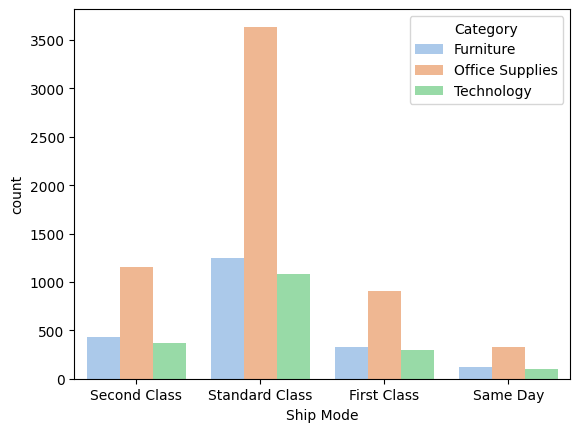

In [16]:
#plot for count of ship mode based on category
sns.countplot(store, x="Ship Mode", hue="Category", palette="pastel")

<Axes: xlabel='Ship Mode', ylabel='count'>

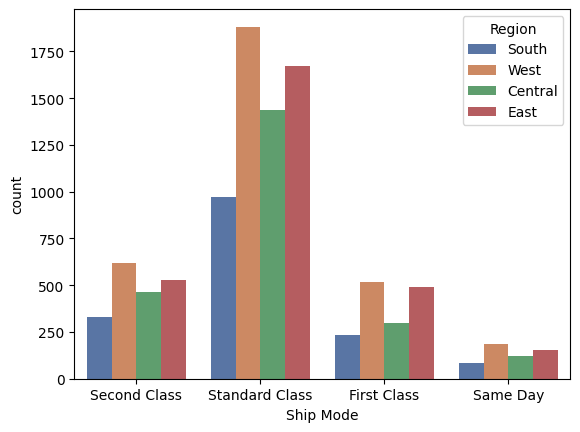

In [17]:
#plot for count of ship mode based on Region

sns.countplot(store, x="Ship Mode", hue="Region", palette="deep")

<Axes: xlabel='Ship Mode', ylabel='count'>

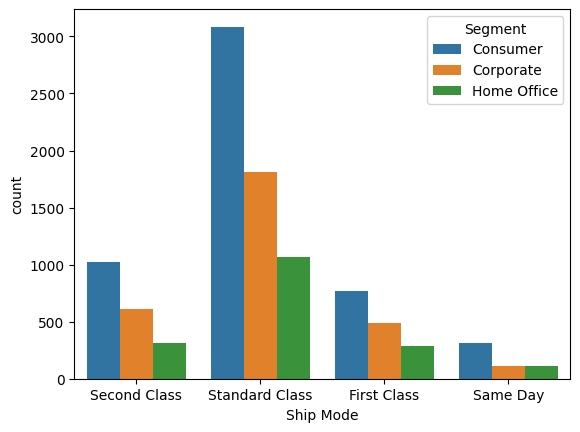

In [18]:
sns.countplot(store, x="Ship Mode", hue="Segment")

In [19]:
#grouping segment, category and finding quantity
seg_cat_quant = store.groupby(["Segment", "Category"])["Quantity"].sum().reset_index().sort_values(["Segment", "Quantity"],
                                                                                                   ascending=[True, False])
ff.create_table(seg_cat_quant)

<Axes: xlabel='Segment', ylabel='Quantity'>

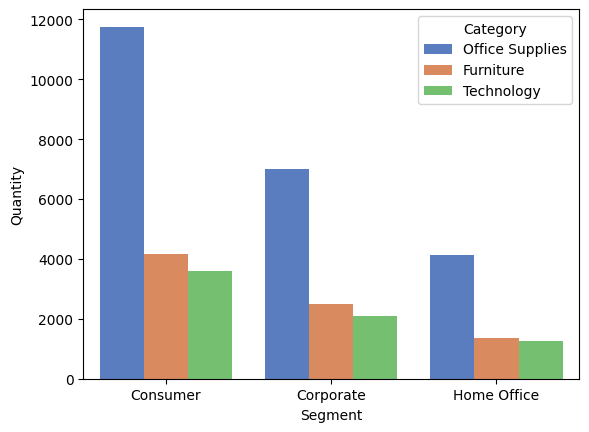

In [20]:
#bar plot to compare how many orders were placed for each category by each segment
sns.barplot(seg_cat_quant, x="Segment", y="Quantity", hue="Category", palette="muted")

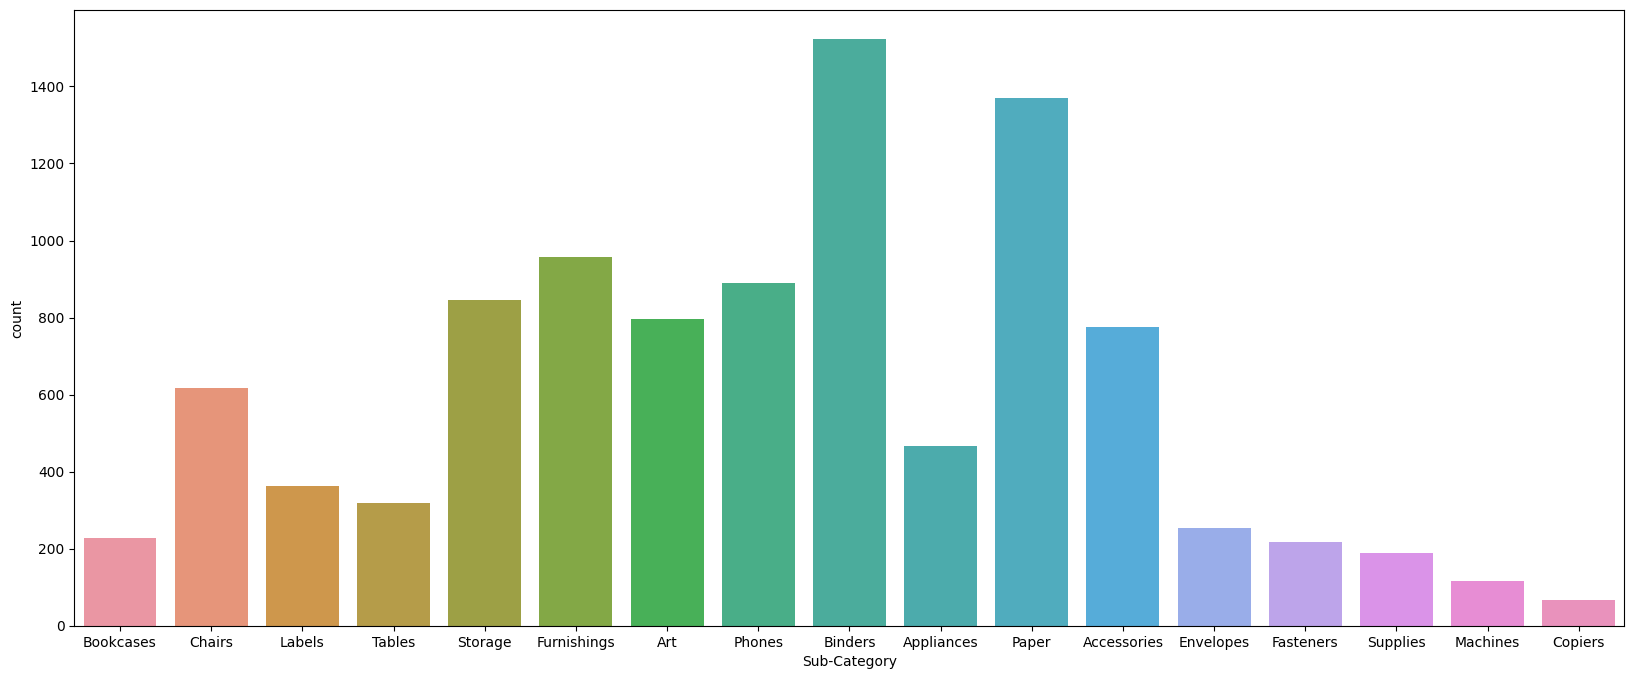

In [21]:
#count of sub-category items occurence this is not the quantity but the amount of times the products has been ordered
plt.figure(figsize=(20, 8))
sns.countplot(store, x="Sub-Category")

plt.show()

In [22]:
#most revenue generating category
most_rev = round(store.groupby("Category")["Sales"].sum().reset_index(),2)
ff.create_table(most_rev)

<Axes: xlabel='Category', ylabel='Sales'>

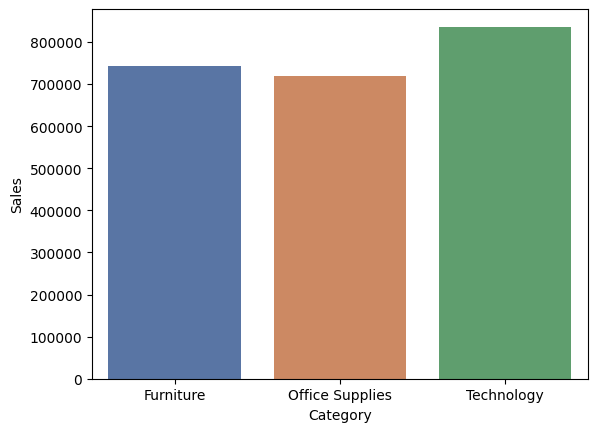

In [23]:
#plot for most revenue gererating categories
sns.barplot(data=most_rev, x="Category", y="Sales", palette="deep")

In [24]:
#most revenue generating sub-categories
rev_sub = round(store.groupby("Sub-Category")["Sales"].sum().reset_index().sort_values("Sales"),2)
ff.create_table(rev_sub, "aggrnyl")

In [25]:
px.bar(rev_sub, x="Sub-Category", y="Sales",
       color="Sales", color_continuous_scale="aggrnyl",
       text="Sales",
       title="Comparing Revenue Generation Sub-Category Wise")

In [26]:
#comparing Profits category wise
cat_profit = round(store.groupby("Category")["Profit"].sum().reset_index(),2)
ff.create_table(cat_profit)

In [27]:
#plotting profit according to category
px.bar(cat_profit, x="Category", y="Profit",
       color="Profit", color_continuous_scale="oryel",
       text="Profit",
       title="Comparing Profit Category Wise")

In [28]:
#sub-category wise profit
sub_cat_profit = round(store.groupby("Sub-Category")["Profit"].sum().reset_index().sort_values("Profit"),2)
ff.create_table(sub_cat_profit)

In [29]:
#plotting the Profit for sub-category
px.bar(sub_cat_profit, x="Sub-Category", y="Profit",
       color="Profit", color_continuous_scale="magenta",
       text="Profit",
       title="Comparing Sub-Category Wise Profit for Each Product")

# **Tables, Bookcases and Supplies needs to be dealt with as the Store is Losing Money on These Products**

In [30]:
#merging revenue and profit
rev_profit = most_rev.merge(cat_profit, on="Category", how="inner")
ff.create_table(rev_profit)

In [31]:
px.bar(rev_profit, x='Category', y=['Sales', 'Profit'],
      labels={'value': 'Amount'},
      title='Sales and Profit by Category',
      barmode="group")



# Furniture Category isn't generating a enough of profit oppossed to investments

In [32]:
#merging the Revenue sub-category with profit of sub-category
rev_sub_profit = rev_sub.merge(sub_cat_profit, on="Sub-Category", how="inner").sort_values("Profit")
rev_sub_profit["Profit_Margin"] = round((rev_sub_profit["Profit"]/rev_sub_profit["Sales"])*100).astype(str)+"%"
ff.create_table(rev_sub_profit)

In [33]:
px.bar(rev_sub_profit, x="Sub-Category", y=["Sales", "Profit"],
       labels={"value":"Amount"},
       title="Comparing the Revenue for Sub-Category and Each Products Profit",
       barmode="group")

In [34]:
#exploring why there is a loss on table sales
table_disc = round(store.loc[store["Sub-Category"] == "Tables"].Discount.mean(),2)
table_disc

0.26

In [35]:
table = store.loc[store["Sub-Category"] == "Tables"]

<ipython-input-36-c2ebb4a3365c>:1: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




<Axes: xlabel='Discount', ylabel='Density'>

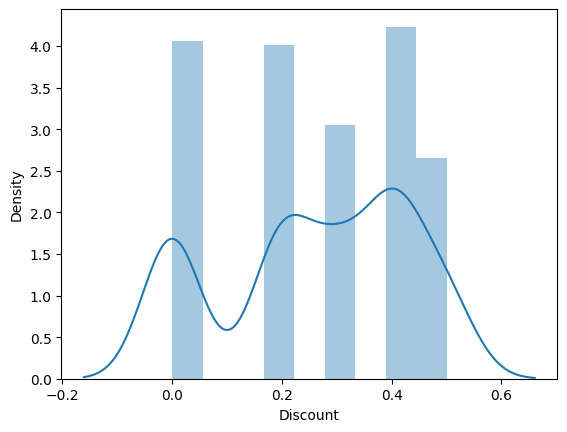

In [36]:
sns.distplot(table["Discount"])

# The mean discount for tables sold is 0.26 and as tables as a whole are not generating profit, instead the store is losing money on tables, so the discount needs to be set to 0.

In [39]:
#comparing region wise profits
reg_profit = round(store.groupby("Region")["Profit"].agg(["sum", "mean"]).reset_index(),2)
ff.create_table(reg_profit)

In [45]:
px.pie(reg_profit, names="Region", values="sum",
       color="Region", color_discrete_sequence=px.colors.sequential.OrRd,
       title="Comparing Profits Region Wise",
       ).update_traces(textinfo="label+value+percent")

In [50]:
#region wise sub-category profits
reg_sub_cat_profit = round(store.groupby(["Region","Sub-Category"])["Profit"].agg(["sum", "mean"]).reset_index(),2)
ff.create_table(reg_sub_cat_profit)

In [67]:
px.bar(reg_sub_cat_profit, x="Region", y="sum",
       facet_col="Sub-Category",
       facet_col_wrap=3,
       color="Region", color_discrete_sequence=px.colors.sequential.Sunset,
       height=2000)

# **Business Problems**

> The Store has high investments on some products but the return value isn't comparetively good enough for those products.

> The Business is selling some products for a negative profit margin, causing losses.

> This could be due to Products not being purchased regularly and need a clearance on the dead stock.

>Tables, Bookcases and Supplies need to be sold for a higher margin and if that is not possible the store should reconsider selling the products or investing in them.

> Central Region is having a negative profit margin in many categories.

> West region is making the store good profits in most categories, albeit we see negative profits in a couple of sub categories.